<a href="https://colab.research.google.com/github/Rogerio-mack/Machine-Learning-I/blob/main/ML8_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **8. Aprendizado Supervisionado com R**
---

Nesta aula você vai aprender:

*   Como empregar o R para criar modelos de Aprendizado de Máquina Supervisionado
*   Como resolver problemas de Classificação e Regressão
*   Como fazer seleções simples de Hiperparâmetros e Modelos em R

Ao longo do curso você tem empregado Python e R para analisar e entender dados. De fato essas são as linguagens mais empregadas hoje quando falamos de Ciência de Dados havendo diferentes campos onde uma é mais empregada que a outra. Por exemplo, há um uso muito grande de R nos campos como Economia, Biologia e Bioinformática, havendo um grande número de recursos e bibliotecas de R para essas áreas. Já campos onde é importante o uso de dados de imagens e texto, há uma predominância clara do Python com um número muito maior de bibliotecas de recusos disponíveis. Assim, vale a pena verificarmos nesta última aula como podemos empregar o R em tarefas de Aprendizado de Máquina Supervisionado e vamos aqui aprender como aplicar modelos como o **K-Vizinhos mais Próximos, Árvores de Decisão e Modelos de Regressão com R**, aprendendo a executar tarefas de classificação, regressão e seleção de modelos como aplicamos antes em Python. Essa aula portanto, focará apenas na aplicação e execução das tarefas em R, e supõe que você já tenha os conceitos de aprendizado supervisionado como **sobreajuste, conjuntos de treinamento e teste, validação cruzada, métricas de eficiência dos modelos etc.** e buscaremos apenas apresentar soluções básicas em R, sem empregar um número demasiado de recursos e bibliotecas de R poderosas que não poderíamos explorar aqui em uma única aula.  






In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.lines import Line2D
import seaborn as sns

In [3]:
# suporte a execução de células em R
%load_ext rpy2.ipython

> *Você deve recordar que o comando `%load_ext rpy2.ipython` pode ser empregado em um notebook Python no Google Colaboratory para carregar o engine de execução do R. As células do notebook podem então invocar o engine R através do comando `%%R` no início da célula. Note, entretanto, que as células Python e R não se conversam e, portanto, não compartilham dados ou variáveis. No Colan você pode também empregar um notebook que tenha apenas o engine R chamando no browser `colab.to/R`.*

# CASO: Iris Data Set

O iris é um conjunto de dados que você já deve ter tido contato. É um dataset bastante popular e  simples com dados de comprimento e largura de pétalas e sépalas para 3 tipos diferentes de flores do tipo iris. Esse é um data set *buit-in* que já faz parte do pacote R e pode ser acessado diretamente. 


In [3]:
%%R

head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


As diferentes espécies e suas quantidades:

In [4]:
%%R

table(iris$Species)


    setosa versicolor  virginica 
        50         50         50 


Vamos primeiramente fazer um modelo de regressão linear múltipla para estimar o comprimento de pétalas a partir das outras medidas para em seguida empregarmos um modelo de Árvore de Decisão para a classificação da espécie de iris com base nas medidas de pétala e sépala. 

Antes, vale a pena você relembrar como criar esses dois modelos em Python com o scikit-learn.

## Regressão Linear em Python

Os dados de iris podem ser obtidos diretamente dos datasets do pacote seaborn.

In [5]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Regresssão Simples

Vamos primeiro aplicar um modelo de regressão simples, empregando como entrada somente valores de largura de pétala para estimar seu comprimento.

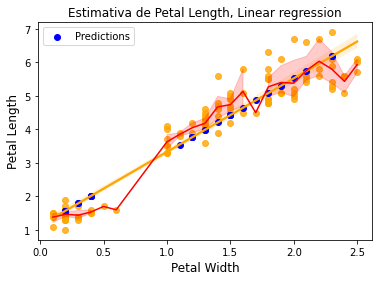

Model Score (R2): 0.93
Model Coef: 2.20
Model Intercept: 1.13
Model Prediction: 3.99


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df[['petal_width']]
y = df.petal_length

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regressor = LinearRegression().fit(X_train, y_train)

y_pred = regressor.predict(X_test)

sns.regplot(x=X_train.iloc[:,0],y=y_train,color='orange')
sns.lineplot(x=X_train.iloc[:,0],y=y_train,color='red')
plt.scatter(X_test.iloc[:,0],y_pred,color='blue',marker='o',label='Predictions')

plt.title('Estimativa de Petal Length' + ', Linear regression')
plt.xlabel('Petal Width',fontsize=12)
plt.ylabel('Petal Length',fontsize=12)
plt.legend()

plt.show()

print(f'Model Score (R2): {regressor.score(X_test, y_test):.2f}')

print(f'Model Coef: {regressor.coef_[0]:.2f}')

print(f'Model Intercept: {regressor.intercept_:.2f}')

print(f'Model Prediction: {regressor.predict(np.array([[1.3]]))[0]:.2f}')

As estimativas sobre o conjunto de teste aparecem em azul, exatamente sobre a reta estimada. Aqui empregamos a separação entre os conjuntos de treinamento e teste para a regressão. É comum, entretanto, você encontrar a aplicação de modelos de regressão linear empregando todos os dados de treinamento. É o caso, por exemplo, quando você não está interessado em selecionar modelos e deseja unicamente empregar a regressão linear. Aquis, entretanto, optamos pelo caso mais geral.

### Regressão Múltipla 

O mesmo esquema de código pode ser aplicado empregando todas as medidas disponíveis para estimar os comprimentos de pétala. 

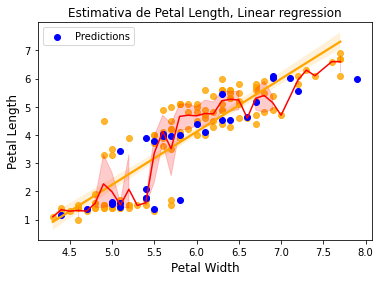

Model Score (R2): 0.95
Model Coef 0 : 0.75
Model Coef 1 : -0.63
Model Coef 2 : 1.43
Model Intercept: -0.39
Model Prediction: 2.78


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['species','petal_length'])
y = df.petal_length

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

regressor = LinearRegression().fit(X_train, y_train)

y_pred = regressor.predict(X_test)

sns.regplot(x=X_train.iloc[:,0],y=y_train,color='orange')
sns.lineplot(x=X_train.iloc[:,0],y=y_train,color='red')
plt.scatter(X_test.iloc[:,0],y_pred,color='blue',marker='o',label='Predictions')

plt.title('Estimativa de Petal Length' + ', Linear regression')
plt.xlabel('Petal Width',fontsize=12)
plt.ylabel('Petal Length',fontsize=12)
plt.legend()

plt.show()

print(f'Model Score (R2): {regressor.score(X_test, y_test):.2f}')

for i in range(len(regressor.coef_)):
  print(f'Model Coef {i} : {regressor.coef_[i]:.2f}')

print(f'Model Intercept: {regressor.intercept_:.2f}')

print(f'Model Prediction: {regressor.predict(np.array([[4.5, 3.25, 1.3]]))[0]:.2f}')


Obviamente agora não exibimos uma *reta* pois estamos exibindo apenas uma dimensão dos dados de entrada. Mas você pode notar até um incremento no *R2* ao empregarmos a regressão múltipla.

## Regressão Linear em R

Vamos agora resolver o mesmo problema em R. Faremos diretamente o modelo de regressão múltipla.

In [8]:
%%R

head(iris)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species
1          5.1         3.5          1.4         0.2  setosa
2          4.9         3.0          1.4         0.2  setosa
3          4.7         3.2          1.3         0.2  setosa
4          4.6         3.1          1.5         0.2  setosa
5          5.0         3.6          1.4         0.2  setosa
6          5.4         3.9          1.7         0.4  setosa


Para isso podemos empregar a função *linear model* do R, `lm`.

In [9]:
%%R

# formula = 'Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width'
# fit = lm(formula = formula, data=iris)

# ou simplesmente 
fit = lm(Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width, data=iris)

summary(fit)


Call:
lm(formula = Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width, 
    data = iris)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.99333 -0.17656 -0.01004  0.18558  1.06909 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.26271    0.29741  -0.883    0.379    
Sepal.Length  0.72914    0.05832  12.502   <2e-16 ***
Sepal.Width  -0.64601    0.06850  -9.431   <2e-16 ***
Petal.Width   1.44679    0.06761  21.399   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.319 on 146 degrees of freedom
Multiple R-squared:  0.968,	Adjusted R-squared:  0.9674 
F-statistic:  1473 on 3 and 146 DF,  p-value: < 2.2e-16



Em R muitos modelos empregam a ideia de uma *fórmula* para indicar as variáveis independentes e dependente do modelo como acima. 

$$ formula = 'var_{dependente} = var_{ind_1} + var_{ind_2} + \dots + var_{ind_n} \space  \space \space    '$$

Esse estilo deu origem à mesma forma de notação que você encontra no pacote `statsmodel` do Python. 

A função `predict` pode ser empregada para predição do modelo com base em um conjunto de dados com a mesma estrutura que foi construído o modelo.

In [10]:
%%R
Sepal.Length = c(4.5)
Sepal.Width = c(3.25)
Petal.Width = c(1.3)
newdata = data.frame(Sepal.Length, Sepal.Width, Petal.Width)

prediction = predict(fit, newdata)    
print(prediction)

       1 
2.799703 


Os resultados, como você pode observar abaixo, são exatamente os mesmos obtidos com o scikit-learn Python: score, coeficientes, intercept, predição. Não fizemos a separação de dados de treinamento e teste pois, neste caso, cada linguagem produziria conjuntos, e portanto resultados, diferentes. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df.drop(columns=['species','petal_length'])
y = df.petal_length

regressor = LinearRegression().fit(X, y)

print(f'Model Score (R2): {regressor.score(X, y):.3f}')

for i in range(len(regressor.coef_)):
  print(f'Model Coef {i} : {regressor.coef_[i]:.3f}')

print(f'Model Intercept: {regressor.intercept_:.3f}')

print(f'Model Prediction: {regressor.predict(np.array([[4.5, 3.25, 1.3]]))[0]:.5f}')


Model Score (R2): 0.968
Model Coef 0 : 0.729
Model Coef 1 : -0.646
Model Coef 2 : 1.447
Model Intercept: -0.263
Model Prediction: 2.79970


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


Existem pacotes em R para produzir a separação de conjuntos de treinamento e teste e você verá isso mais adiante. Aqui implementamos a separação de forma direta o que pode ser útil e suficiente em muitos casos. 

In [12]:
%%R

set.seed(123)

L = sample(1:nrow(iris),round(0.2*nrow(iris)))  

test = iris[L,]
train = iris[-L,]

fit = lm(Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width, data=train)

print(summary(fit))

prediction = predict(fit, newdata)    
print(prediction)


Call:
lm(formula = Petal.Length ~ Sepal.Length + Sepal.Width + Petal.Width, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.97489 -0.16614 -0.01738  0.19614  1.06296 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -0.21871    0.33695  -0.649    0.518    
Sepal.Length  0.73561    0.06515  11.291  < 2e-16 ***
Sepal.Width  -0.66307    0.07395  -8.966 6.24e-15 ***
Petal.Width   1.42322    0.07237  19.665  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.3185 on 116 degrees of freedom
Multiple R-squared:  0.9671,	Adjusted R-squared:  0.9662 
F-statistic:  1135 on 3 and 116 DF,  p-value: < 2.2e-16

       1 
2.786746 


O comando `seed` acima é a geração de semente aleatória e permitirá a reprodutibilidade dos resultados a cada nova execução gerandos os mesmos valores aleatórios do vetor 'L' que seleciona as instâncias de treinamento e teste dos dados.

Temos então um modelo completo para aplicação de Regressão Múltipla em R, bastante próximo ao que você aprendeu  em  Python e com resultados bastante próximos.

> *Python ou R? Qual empregar? Não há de fato muita diferença na codificação dessas funções em uma ou outra linguagem e discussões do tipo está ou outra linguagem é melhor devem ser evitadas. Ambas são linguagens reconhecidas por sua simplicidade e, em geral, você vai se sentir mais confortável em empregar uma ou outra de acordo com sua familiaridade. Mas não há, de fato, nada muito complicado em transpor os códigos mais simples de uma para outra. Empregue a que você se sente mais confortável. **A melhor ferramenta é a que você conhece e que permite você alcançar os resultados que deseja**. Mas fique atento, no caso de problemas reais, no contexto em que você está aplicando os modelos. Existem áreas onde é mais comum empregarmos uma ou outra linguagem como falamos no início desta aula.*

## Classificação em Python: Árvore de Decisão

Vamos agora relembrar como aplicamos os estimadores de classificação em Python para, em seguida, fazermos a mesma solução em R. Vamos relembrar como aplicamos o regressor de Árvores de Decisão.

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X = df.drop(columns='species')
y = df['species']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.3, random_state=123)

clf = DecisionTreeClassifier()  

clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

accuracy = clf.score(X_test, y_test)
print('\nScore de Acuracidade:\n')
print(f'{accuracy:.2f}')

print('\nClassification Report:\n')
print(classification_report(y_test, y_pred))

newcases = pd.DataFrame({'sepal_length':[5.1], 'sepal_width':[2.8], 'petal_length':[1.6], 'petal_width':[0.3]})

print('Class Prediction:', clf.predict(newcases))



Score de Acuracidade:

0.89

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.86      0.80      0.83        15
   virginica       0.81      0.87      0.84        15

    accuracy                           0.89        45
   macro avg       0.89      0.89      0.89        45
weighted avg       0.89      0.89      0.89        45

Class Prediction: ['setosa']


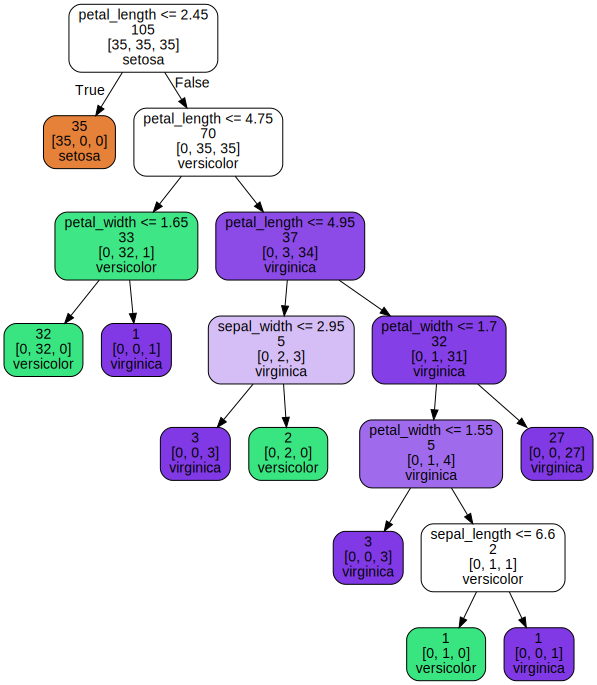

In [14]:
from sklearn import tree
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=list(df.columns.values[0:-1]),  
                     class_names=list(sorted(df['species'].unique())),  
                     filled=True, rounded=True,  
                     special_characters=False,
                     proportion=False, impurity=False, node_ids=False,label=None)  
graph = graphviz.Source(dot_data)  
graph 

## Classificação em R: Árvore de Decisão

Em Python, embora existam outras, empregamos uma única biblioteca de Aprendizado de Máquina, o scikit-learn. De fato essa a biblioteca mais empregada e possui boa algoritmos de interesse, exceto os mais recentes algoritmos de Deep Learning. 

Em R, entretanto, os algoritmos de Aprendizado de Máquina encontram-se na maior parte em diferentes bibliotecas, havendo ainda para alguns casos mais que uma implementação para o mesmo algoritmo. Árvores de Decisão, por exemplo, podem ser encontradas no pacote `ctree` ou ainda no pacote `rpart`. Enquanto no Python, como você viu, o   uso de uma única biblioteca garante uma uniformidade bastante grande entre a aplicação dos diferentes modelos, em R essa uniformidade não é tão grande podendo haver grande diferença entre a aplicação de um modelo ou outro. 

Vamos empregar aqui  o pacote `rpart` e um complemento para a visualização de uma Árvore de Decisão. 

In [15]:
%%R
install.packages('rpart.plot')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/rpart.plot_3.1.0.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 672013 bytes (656 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [36]:
%%R
library(rpart)
library(rpart.plot)

set.seed(123)

L = sample(1:nrow(iris),round(0.3*nrow(iris)))  

test = iris[L,]
train = iris[-L,]

fit = rpart(Species ~  .,data=train)

rpart.plot(fit, extra = 106)


As variáveis preditoras `X` e objetivo `y` do modelo são mais uma vez determinadas pela notação de fórmula, e a fórmula:

```
Species ~ .
```

Equivale a escrever:

```
Species = Petal.Length +  Petal.Width + Sepal.Length + Sepal.Width + Petal.Width
```

Pois o '.' indica que todos os atributos do dataframe dos dados serão empregados como preditores. 


In [17]:
%%R
pred = predict(fit,test,type = "class")
print(pred)

cm = table(test$Species, pred)
cat('\n\n Matriz de Confusão: \n')
print(cm)

cat('\n\n Acuracidade: ', sum(diag(cm))/sum(cm))

        14         50        118         43        150        148         90 
    setosa     setosa  virginica     setosa  virginica  virginica versicolor 
        91        143         92        137         99         72         26 
versicolor  virginica versicolor  virginica versicolor versicolor     setosa 
         7         78         81        147        103        117         76 
    setosa  virginica versicolor  virginica  virginica  virginica versicolor 
        32        106        109        136          9         41         74 
    setosa  virginica  virginica  virginica     setosa     setosa versicolor 
        23         27         60         53        126        119        121 
    setosa     setosa versicolor versicolor  virginica  virginica  virginica 
        96         38         89         34         93         69        138 
versicolor     setosa versicolor     setosa versicolor versicolor  virginica 
       130         63         13 
versicolor versicolor     seto

In [18]:
%%R
Sepal.Length = c(4.5)
Sepal.Width = c(3.25)
Petal.Length = c(1.3)
Petal.Width = c(0.3)
newdata = data.frame(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)

prediction = predict(fit, newdata, type = "class")   
print(prediction)



     1 
setosa 
Levels: setosa versicolor virginica


A função predict é mais ou menos comum podendo ser aplicada a diferentes modelos de diferentes pacotes. Não há, entretanto, funções diretas equivalentes às do scikit-learn para o score dos modelos, a acuracidade ou algo como o classification report. Você pode entretanto obter facilmente a Matriz de Confusão e, a partir daí, tirar todas as métricas que deseja como fizemos acima para a acuracidade.

## Classificação em R: Naive Bayes

Embora tenhamos de lidar com diferentes pacotes para diferentes modelos as funções mais simples que empregamos aqui podem ser aplicadas diretamente de um modelo para outro. 

Você pode aplicar, por exemplo, o modelo Naive Bayes que, à exemplo das Árvores de Decisão, emprega a probabilidade (a proporção) dos valores, no lugar dos valores, para construir um modelo dos dados. Ele emprega ainda o famoso Teorema de Bayes sobre probabilidades condicionadas. Este é um modelo bastante eficiente e que tem resultados bastante bons mesmo quando a premissa de que as variáveis preditoras não sejam correlacionadas não se verifica, o que ocorre na maior parte dos casos práticos. Por isso, assim como Árvores de Decisão, empregamos esses modelos como um modelo base para, em seguida, buscarmos modelos melhores. O classificador emprega a mesma *formula* e esquema de uso da Árvore de Decisão do pacote `rpart`.

In [19]:
%%R
install.packages('naivebayes')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/naivebayes_0.9.7.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 705994 bytes (689 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[w

In [20]:
%%R
library(naivebayes)

R[write to console]: naivebayes 0.9.7 loaded




================================== Naive Bayes ================================== 
 
- Call: naive_bayes.formula(formula = Species ~ ., data = train, usekernel = T) 
- Laplace: 0 
- Classes: 3 
- Samples: 105 
- Features: 4 
- Conditional distributions: 
    - KDE: 4
- Prior probabilities: 
    - setosa: 0.3524
    - versicolor: 0.3238
    - virginica: 0.3238

--------------------------------------------------------------------------------- 
 [1] setosa     setosa     virginica  setosa     virginica  virginica 
 [7] versicolor versicolor virginica  versicolor virginica  versicolor
[13] versicolor setosa     setosa     virginica  versicolor virginica 
[19] virginica  virginica  versicolor setosa     virginica  virginica 
[25] virginica  setosa     setosa     versicolor setosa     setosa    
[31] versicolor versicolor virginica  virginica  virginica  versicolor
[37] setosa     versicolor setosa     versicolor versicolor virginica 
[43] virginica  versicolor setosa    
Levels: setosa ver

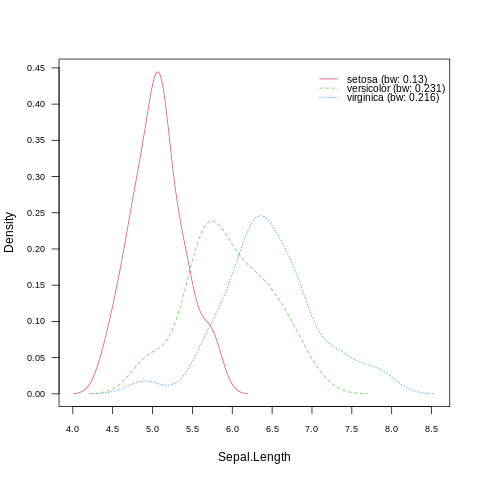

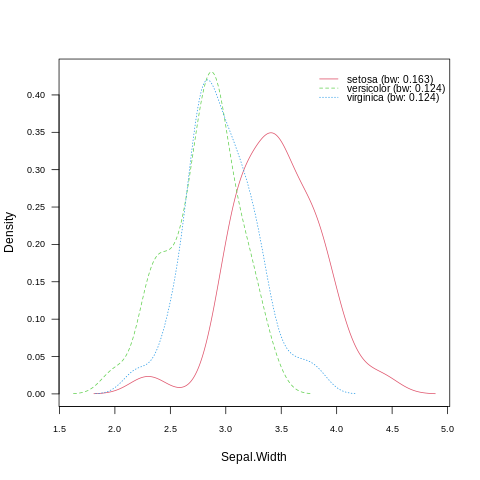

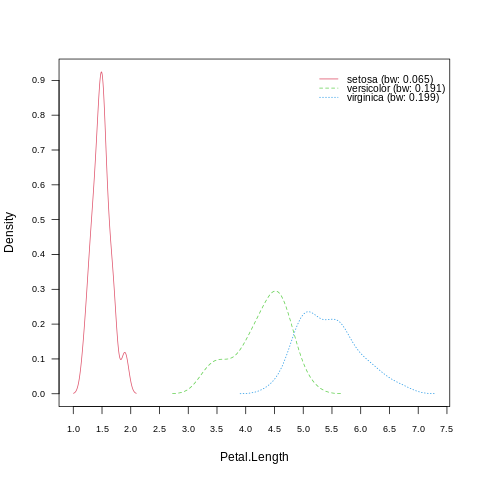

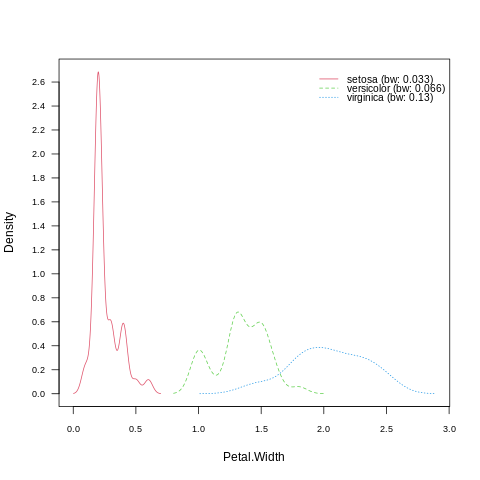

In [21]:
%%R
set.seed(123)

L = sample(1:nrow(iris),round(0.3*nrow(iris)))  

test = iris[L,]
train = iris[-L,]

fit = naive_bayes(Species ~ ., data = train, usekernel = T) 

summary(fit)
plot(fit)

pred = predict(fit,test,type = "class")
print(pred)

cm = table(test$Species, pred)
cat('\n\n Matriz de Confusão: \n')
print(cm)

cat('\n\n Acuracidade: ', sum(diag(cm))/sum(cm))

In [22]:
%%R
prediction = predict(fit, newdata, type = "class")   
print(prediction)

[1] setosa
Levels: setosa versicolor virginica


## Classificação em R: Regressão Logística

Você deve estar lembrado, a Regressão Logística é um separador linear binário. Não pode portanto classificar mais que duas classes. Seu resultado é uma probabilidade $P(positive)$  de a classe ser a classe *positiva* sendo, portanto, $1 - P(positive)$ a probabilidade da outra classe $P(negative)$. 

O R implementa **exatamente** esse algoritmo e não podemos, portanto, empregar a regressão logística aqui para a classificação das 3 classes de iris. Podemos entretanto empregar o modelo para classificar iris *setosa* e *não setosa*. 

In [23]:
%%R
iris_setosa = iris
iris_setosa[,'setosa'] = iris$Species == 'setosa'

head(iris_setosa)

  Sepal.Length Sepal.Width Petal.Length Petal.Width Species setosa
1          5.1         3.5          1.4         0.2  setosa   TRUE
2          4.9         3.0          1.4         0.2  setosa   TRUE
3          4.7         3.2          1.3         0.2  setosa   TRUE
4          4.6         3.1          1.5         0.2  setosa   TRUE
5          5.0         3.6          1.4         0.2  setosa   TRUE
6          5.4         3.9          1.7         0.4  setosa   TRUE


In [24]:
%%R
set.seed(123)

L = sample(1:nrow(iris_setosa),round(0.3*nrow(iris_setosa)))  

test = iris_setosa[L,]
train = iris_setosa[-L,]

fit = glm(Species ~ .,family=binomial(link='logit'),data=train)

summary(fit)

pred = predict(fit,test,type = "response") < 0.5
print(pred)

cm = table(test$setosa, pred)
cat('\n\n Matriz de Confusão: \n')
print(cm)

cat('\n\n Acuracidade: ', sum(diag(cm))/sum(cm))

   14    50   118    43   150   148    90    91   143    92   137    99    72 
 TRUE  TRUE FALSE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE 
   26     7    78    81   147   103   117    76    32   106   109   136     9 
 TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE FALSE FALSE  TRUE 
   41    74    23    27    60    53   126   119   121    96    38    89    34 
 TRUE FALSE  TRUE  TRUE FALSE FALSE FALSE FALSE FALSE FALSE  TRUE FALSE  TRUE 
   93    69   138   130    63    13 
FALSE FALSE FALSE FALSE FALSE  TRUE 


 Matriz de Confusão: 
       pred
        FALSE TRUE
  FALSE    32    0
  TRUE      0   13


 Acuracidade:  1

O classificador empregou a mesma *formula* e esquema de uso dos classificadores de Árvore de Decisão e Naive Bayes. Na predição empregamos o atributo `type = "response"` que retorna os valores de probabilidade da classe. Desse modo, para obtermos a resposta das classes e construirmos a matriz de confusão, associamos os valores True para probabidades < 0.5 e False para probabilidades > 0.5.

Para um classificador logístico multiclass (mais que duas classes) você pode procurar empregar o pacote `require(nnet)` e o modelo `multinom`.

## Classificação com R: K-Vizinhos mais Próximos

Por último vamos ver como empregar o popular K-Vizinhos mais Próximos. Diferentemente da maior parte dos modelos em R ele não emprega uma *fórmula* para definir aos atributos preditores e objetivo que são explicitamente fornecidos como parâmetros da função knn. A bibliteca para essa função é a biblioteca `class`. 

In [25]:
%%R
library(class)

set.seed(123)

L = sample(1:nrow(iris),round(0.3*nrow(iris)))  

train = iris[-L,1:4]
test = iris[L,1:4]

cl = iris[-L,]$Species

pred = knn(train, test, cl, k = 3)

print(pred)

cm = table(iris[L,]$Species, pred)
cat('\n\n Matriz de Confusão: \n')
print(cm)

cat('\n\n Acuracidade: ', sum(diag(cm))/sum(cm))

 [1] setosa     setosa     virginica  setosa     virginica  virginica 
 [7] versicolor versicolor virginica  versicolor virginica  versicolor
[13] versicolor setosa     setosa     versicolor versicolor virginica 
[19] virginica  virginica  versicolor setosa     virginica  virginica 
[25] virginica  setosa     setosa     versicolor setosa     setosa    
[31] versicolor versicolor virginica  virginica  virginica  versicolor
[37] setosa     versicolor setosa     versicolor versicolor virginica 
[43] virginica  versicolor setosa    
Levels: setosa versicolor virginica


 Matriz de Confusão: 
            pred
             setosa versicolor virginica
  setosa         13          0         0
  versicolor      0         16         0
  virginica       0          0        16


 Acuracidade:  1

A função Knn recebe como parâmetros explicitamente  as variáveis preditoras de treinamento e teste, as classes de treinamento `cl`.

```
pred = knn(train, test, cl, k = 3)
```

Seu resultado não é um modelo, mas diretamente as classes previstas.

In [26]:
%%R
Sepal.Length = c(4.5)
Sepal.Width = c(3.25)
Petal.Length = c(1.3)
Petal.Width = c(0.3)
newdata = data.frame(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)

prediction = knn(train, newdata, cl, k=3)   
print(prediction)

[1] setosa
Levels: setosa versicolor virginica


# Pacote `Caret`: Cross Validation, Grid Search

O pacote **Caret** (**C**lassification **A**nd **RE**gression **T**raining) é uma biblioteca que traz um conjunto de funções que tentam agilizar o processo de criação de modelos preditivos em R e que inclui ainda uma série de funcionalidades para separação dos dados, pré-processamento, seleção de atributos, reamostragem, treinamento e seleção de modelos. É, de certo modo, uma biblioteca que busca fornecer as mesmas facilidades que o scikit-learn fornece no Python embora, o Caret, não contemple por exemplo os modelos não supervisionados. Há também uma versão Python, o PyCaret, também bastante empregada comercialmente. 

> **Caret** (**C**lassification **A**nd **RE**gression **T**raining)

>> **R**: https://topepo.github.io/caret/index.html

>> **Python**: https://pycaret.org/





In [27]:
%%R
# A instalação desse pacote pode levar alguns minutos
install.packages('caret')

R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/caret_6.0-92.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 2332731 bytes (2.2 MB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[writ

## Knn: Grid Search e Cross Validation

Vamos ver como podemos empregar a biblioteca Caret para implementar uma seleção de hyperparâmetros empregando ainda a validação cruzada do mesmo modo que aplicamos em Python.

R[write to console]: Loading required package: ggplot2

R[write to console]: Loading required package: lattice



    k
1   1
2   2
3   3
4   4
5   5
6   6
7   7
8   8
9   9
10 10
11 11
12 12


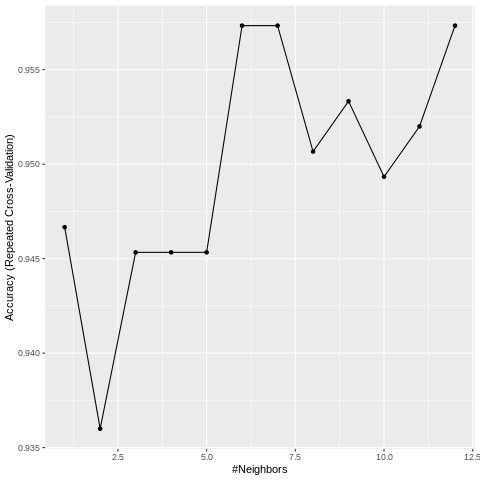

In [28]:
%%R
library(caret)

# Create a cv resampling  
cv = trainControl(
  method = "repeatedcv", 
  number = 10, 
  repeats = 5
)

# Create a hyperparameter grid search
hyper_grid = expand.grid(k=c(1:12))
print(hyper_grid)

# Fit knn model and perform grid search
knn_grid = train(
  Species ~ ., 
  data = iris, 
  method = "knn", 
  trControl = cv, 
  tuneGrid = hyper_grid,
  preProcess = c("center", "scale")   
)

ggplot(knn_grid)


A ideia é a mesma que você empregou em Python. Basicamente usamos duas funções,`trainControl` e `train`. A função `trainControl` apenas serve para declarar os parâmetros da validação cruzada que serão empregados no treinamento. Aqui configuramos o `method = "repeatedcv"` para o cross validation com 10 partições e 5 repetições: as 10 partições são escolhidas aleatoriamente em 5 repetições sendo, o resultado da métrica do modelo, a média obtida em todas as execuções. 

A segunda função, `train`, executa os modelos empregando os esquema de validação cruzada informado (aqui `cv`)  e os demais parâmetros que incluem o modelo a ser empregado (`knn`), os dados (`iris`), a fórmula nos mesmos moldes anteriores para informarmos os atributos preditores e objetivo (`Species ~ .`), pre-processamentos dos dados como funções de  normalização que queremos aplicar, métricas de avaliação etc. O parâmetro `tuneGrid` é uma tabela onde temos o nome do parâmetro e os valores que queremos sejam validados no modelo. No caso do nosso modelo Knn, estamos interessados em variar o modelo para diferentes valores de k, sendo esse o nome do conjunto de valores de 1 a 12.


In [29]:
%%R
knn_grid$results 

    k  Accuracy Kappa AccuracySD    KappaSD
1   1 0.9466667 0.920 0.06172134 0.09258201
2   2 0.9360000 0.904 0.06166253 0.09249379
3   3 0.9453333 0.918 0.05976522 0.08964784
4   4 0.9453333 0.918 0.05822780 0.08734169
5   5 0.9453333 0.918 0.05502422 0.08253632
6   6 0.9573333 0.936 0.05346921 0.08020382
7   7 0.9573333 0.936 0.05987137 0.08980705
8   8 0.9506667 0.926 0.05994707 0.08992060
9   9 0.9533333 0.930 0.06060915 0.09091373
10 10 0.9493333 0.924 0.06107131 0.09160697
11 11 0.9520000 0.928 0.06029406 0.09044110
12 12 0.9573333 0.936 0.05833673 0.08750510


Empregamos a métrica padrão de acuracidade, mas outras métricas podem ser empregadas. Os resultados do modelo podem ser então obtidos no atributo `$results` da saída da função `train` e o gráfico acima mostra os diferentes valores da métrica de acuracidade para os diferentes valores de k. 

In [30]:
%%R
print(max(knn_grid$results$Accuracy))
print(knn_grid$results[ knn_grid$results$Accuracy == max(knn_grid$results$Accuracy), ])
knn_grid$results[ knn_grid$results$Accuracy == max(knn_grid$results$Accuracy), ]$k

[1] 0.9573333
    k  Accuracy Kappa AccuracySD    KappaSD
6   6 0.9573333 0.936 0.05346921 0.08020382
7   7 0.9573333 0.936 0.05987137 0.08980705
12 12 0.9573333 0.936 0.05833673 0.08750510
[1]  6  7 12


Sendo o melhor modelo o de maior acuracidade com $k=6$, podemos agora aplicar esse modelo para novos casos.

In [31]:
%%R
Sepal.Length = c(4.5)
Sepal.Width = c(3.25)
Petal.Length = c(1.3)
Petal.Width = c(0.3)
newdata = data.frame(Sepal.Length, Sepal.Width, Petal.Length, Petal.Width)

prediction = knn(train, newdata, cl, k=6)   
print(prediction)

[1] setosa
Levels: setosa versicolor virginica


O procedimento, para você que já aprendeu como empregar o *grid search* em Python não é de fato muito diferente e você poderia facilmente combinar a busca de melhores hiperparâmetros com a aplicação de diferentes modelos bastando para isso alterar os valores dos parâmetros `method` e os seus hiperparâmetros correspondentes em `tuneGrid` (lembre cada modelo tem hiperparâmetros diferentes). 

# CASO: Biopsy, Câncer de Mama

Este banco de dados de câncer de mama foi obtido dos Hospitais da Universidade de Wisconsin e tem dados de biópsias de tumores de mama para 699 pacientes com 9 atributos preditores. Queremos então criar um modelo de Aprendizado de Máquina em R para a predição das classes dos tumores modo malignos ou benignos. Aplicaremos um modelo de classificação logística e outro de Árvore de Decisão, ambos aplicando validação cruzada e, para o segundo, fazendo o *tunning* de alguns hiperparâmetros.

In [3]:
%%R
library(MASS)

head(biopsy)

       ID V1 V2 V3 V4 V5 V6 V7 V8 V9     class
1 1000025  5  1  1  1  2  1  3  1  1    benign
2 1002945  5  4  4  5  7 10  3  2  1    benign
3 1015425  3  1  1  1  2  2  3  1  1    benign
4 1016277  6  8  8  1  3  4  3  7  1    benign
5 1017023  4  1  1  3  2  1  3  1  1    benign
6 1017122  8 10 10  8  7 10  9  7  1 malignant


## Preparação dos Dados

Como existem valores nulos nos dados vamos aqui simplesmente excluir as instâncias com valores nulos. Também vamos excluir o atributo `ID` uma vez que identificadores únicos não fazem sentido para modelos de classificação. 

In [4]:
%%R
sum(is.na(biopsy))

[1] 16


In [5]:
%%R 
df = na.omit(biopsy[,-c(1)])

## Regressão Logística

Como os dados apresentam uma classe binária, benigno/maligno, podemos aplicar diretamente o modelo de regressão logística para classificar os dados. O modelo requer entretanto que a classe de saída assuma unicamente os valores TRUE/FALSE ou 1/0. Vamos, portanto, antes de aplicar o modelo alterar os valores do atributo `class` para 0 ou 1, conforme o valor benigno ou maligno do atributo. 

In [30]:
%%R
library(caret)

df_ = df
df_$class = as.numeric(df_$class) - 1  

cv = trainControl(method="repeatedcv", number=5, repeats=2)

logistic_grid = train(class~., data=df_,
                  method="glm", 
                  family="binomial",
                  trControl=cv, 
                  preProcess = c("center", "scale"))

predict_test = predict(logistic_grid, newdata=df_, type="raw")

predict_test = ifelse(predict_test[]>0.5 , 1, 0) # 1="malignant" 0="benign"

c_matrix = table(predict_test,df_$class)
print(c_matrix)

cat('Accuracy: ', sum(diag(c_matrix))/sum(c_matrix)*100, ' %', "\n")

            
predict_test   0   1
           0 434  11
           1  10 228
Accuracy:  96.92533  % 


Não fizemos aqui nenhum *grid search* de hiperparâmetros e essa forma de empregar a função `train` do pacote Caret mostra como utilizar o pacote para fazer o treinamento de um único modelo com a validação cruzada. 

Aplicamos ao final o modelo para todo o conjunto original de dados para obtermos a matriz de confusão e uma acuracidade aproximada do modelo uma vez que o mais correto seria fazermos sobre um conjunto de teste separado antes do treinamento do modelo. Mas nosso interesse aqui é apenas entender como empregar as funções do pacote e deixamos esse ajuste bastante simples a cargo de você.

## Árvore de Decisão

A lista de modelos disponíveis para empregarmos no pacote Caret é bastante grande e pode ser obtida com o comando abaixo.

In [ ]:
%%R
unique(caret::modelLookup()$model)

O Caret funciona como um envelope (*wrapper*) de vários pacotes de Aprendizado de Máquina. 

Vamos aqui empregar o pacote `ctree2` para implementar um modelo de Árvore de Decisão. Se você já não tiver instalado, o Caret irá solicitar qeu você aprove a instalação do pacote `party` que contem o o método `ctree2`. Apenas para evitar isso e termos a execução completa do notebook sem intervenção vamos fazer a instalação do pacote aqui diretamente. 

In [ ]:
%%R
install.packages('party')

  maxdepth mincriterion
1        2         0.95
2        3         0.95
3        4         0.95
4        5         0.95
5        6         0.95
6        7         0.95
7        8         0.95
8        9         0.95
9       10         0.95


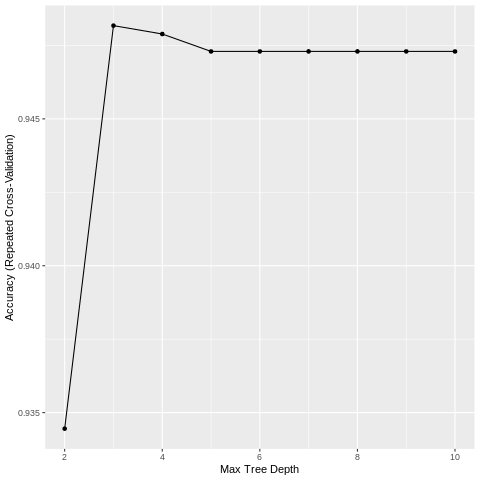

In [14]:
%%R
library(caret)

# Create a cv resampling  
cv = trainControl(
  method = "repeatedcv", 
  number = 10, 
  repeats = 5
)

# Create a hyperparameter grid search
hyper_grid = expand.grid(maxdepth = c(2:10), mincriterion=0.95)                                             
print(hyper_grid)

# Fit knn model and perform grid search
ctree2_grid = train(
  class ~.,  # cuidado, class é uma palavra reservada do R
  data = df, 
  method = "ctree2", 
  trControl = cv, 
  tuneGrid = hyper_grid,
  preProcess = c("center", "scale")   
)

ggplot(ctree2_grid)


Como nosso propósito é apenas ilustrar o uso da funcionalidade de *grid search* empregamos apenas dois parâmetros muito simples fixando ainda o intervalo de confiança em 0.95.

In [17]:
%%R
ctree2_grid$results

  maxdepth mincriterion  Accuracy     Kappa AccuracySD    KappaSD
1        2         0.95 0.9344524 0.8564326 0.02766981 0.06034672
2        3         0.95 0.9481738 0.8863559 0.02495345 0.05483562
3        4         0.95 0.9478885 0.8856893 0.02495502 0.05507615
4        5         0.95 0.9472960 0.8844884 0.02528255 0.05569075
5        6         0.95 0.9472960 0.8844884 0.02528255 0.05569075
6        7         0.95 0.9472960 0.8844884 0.02528255 0.05569075
7        8         0.95 0.9472960 0.8844884 0.02528255 0.05569075
8        9         0.95 0.9472960 0.8844884 0.02528255 0.05569075
9       10         0.95 0.9472960 0.8844884 0.02528255 0.05569075


O melhor resultado é dado pelo segundo modelo que emprega uma Árvore de Decisão de profundidade 3, fazendo portanto uma poda da Árvore. Todo histórico da execução dos modelos e métricas obtidas podem ser recuperados a partir do objeto criado inspecionando suas variáveis, mas omitimos aqui pelo grande tamanho da saída gerada.

In [27]:
%%script false 
# Elimine o comando acima se quiser produzir a saída do comando abaixo. A saída será bastante grande.
%%R
str(ctree2_grid)

Mas o melhor modelo obtido pela seleção de hiperparâmetros pode facilmente ser verificado no atributo `$finalModel`, incluindo neste caso o plot da Árvore de Decisão do modelo (note, não estamos empregando aqui o pacote `rpart`, um outro pacote que também implementa Árvores de Decisão e que empregamos anteriormente).

In [24]:
%%R
ctree2_grid$finalModel


	 Conditional inference tree with 7 terminal nodes

Response:  .outcome 
Inputs:  V1, V2, V3, V4, V5, V6, V7, V8, V9 
Number of observations:  683 

1) V6 <= -0.4239068; criterion = 1, statistic = 461.597
  2) V2 <= -0.04920005; criterion = 1, statistic = 319.245
    3) V8 <= -0.284896; criterion = 1, statistic = 85.493
      4)*  weights = 393 
    3) V8 > -0.284896
      5)*  weights = 15 
  2) V2 > -0.04920005
    6)*  weights = 24 
1) V6 > -0.4239068
  7) V3 <= -0.4066234; criterion = 1, statistic = 65.179
    8) V1 <= -0.1567545; criterion = 1, statistic = 19.138
      9)*  weights = 24 
    8) V1 > -0.1567545
      10)*  weights = 8 
  7) V3 > -0.4066234
    11) V7 <= 0.2265198; criterion = 0.991, statistic = 10.769
      12)*  weights = 74 
    11) V7 > 0.2265198
      13)*  weights = 145 


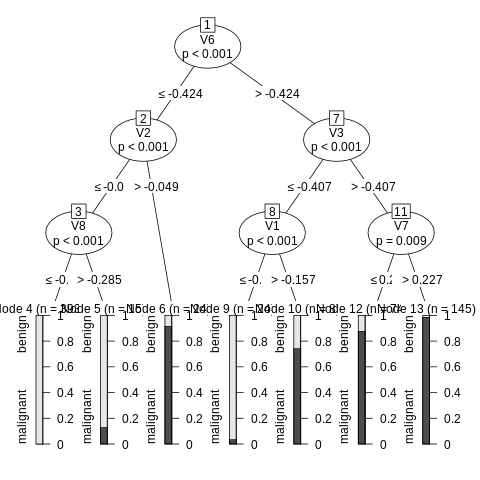

In [38]:
%%R
plot(ctree2_grid$finalModel)

In [15]:
%%R
predict_test = predict(ctree2_grid, newdata=df)

c_matrix = table(predict_test,df$class)
print(c_matrix)

cat('Accuracy: ', sum(diag(c_matrix))/sum(c_matrix)*100, ' %', "\n")

            
predict_test benign malignant
   benign       429         3
   malignant     15       236
Accuracy:  97.36457  % 


Novamente aplicamos ao final o modelo para todo o conjunto original de dados para obtermos a matriz de confusão e uma acuracidade do modelo sobre esses dados e a você adaptar esse código para obter a acuracidade sobre um conjunto de teste separado antes do treinamento do modelo. 

# CASO: Classificando o MNIST ($28 \times 28$)

Vamos voltar ao nosso conjunto de dígitos escritos à mão empregados na aula anterior, o famoso **MNIST** (http://yann.lecun.com/exdb/mnist/).

Os dados em R podem ser obtidos diretamente do pacote `dslabs`. Por questão do tempo de execução vamos empregar apenas uma pequena amostra de 3000 dígitos selecionados aleatoriamente do conjunto de dados original (lembre-se são 70000 amostras no original).

In [ ]:
%%R
install.packages('dslabs')



In [4]:
%%R
# import MNIST training data
mnist = dslabs::read_mnist()
names(mnist)

[1] "train" "test" 


In [42]:
%%R
set.seed(1)
L = sample(nrow(mnist$train$images), size = 3000)
X = mnist$train$images[L, ]
y = factor(mnist$train$labels[L])

Além da seperação de um número reduzido de amostras é conveniente renomearmos os atributos.

In [43]:
%%R
# rename features
colnames(X) = paste0('pixel_', 1:ncol(X))
X[1:6,1:9]


     pixel_1 pixel_2 pixel_3 pixel_4 pixel_5 pixel_6 pixel_7 pixel_8 pixel_9
[1,]       0       0       0       0       0       0       0       0       0
[2,]       0       0       0       0       0       0       0       0       0
[3,]       0       0       0       0       0       0       0       0       0
[4,]       0       0       0       0       0       0       0       0       0
[5,]       0       0       0       0       0       0       0       0       0
[6,]       0       0       0       0       0       0       0       0       0


E podemos também empregar uma função em R para visualizar os dados.

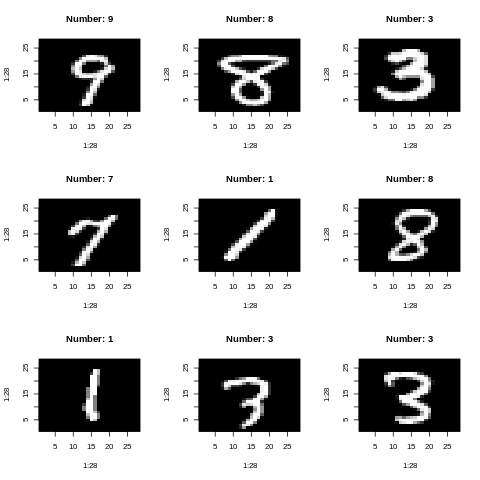

In [44]:
%%R
#Function to visualize a number
img <- function(X, y, row_index){

#Obtaining the row as a numeric vector
r = as.numeric(X[row_index, ])

#Creating a empty matrix to use
im = matrix(nrow = 28, ncol = 28)

#Filling properly the data into the matrix
j = 1
for(i in 28:1){
  im[,i] <- r[j:(j+27)]
  j <- j+28
}  

#Plotting the image with the label
image(x = 1:28, y = 1:28, z = im, 
      col=gray((0:255)/255), 
      main = paste("Number:", y[row_index]))
}

par(mfcol=c(3,3))
for (i in 1:9) { 
  img(X,y,i)
}

## Knn MNIST

Finalmente podemos então aplicar um modelo Knn empregando validação cruzada e buscando por melhores valores de K com o treinamento do modelo a partir do pacote Caret.

R[write to console]: Warning in preProcess.default(thresh = 0.95, k = 5, freqCut = 19, uniqueCut = 10,  :
R[write to console]: 
 
R[write to console]:  These variables have zero variances: pixel_1, pixel_2, pixel_3, pixel_4, pixel_5, pixel_6, pixel_7, pixel_8, pixel_9, pixel_10, pixel_11, pixel_12, pixel_13, pixel_14, pixel_15, pixel_16, pixel_17, pixel_18, pixel_19, pixel_20, pixel_21, pixel_22, pixel_23, pixel_24, pixel_25, pixel_26, pixel_27, pixel_28, pixel_29, pixel_30, pixel_31, pixel_32, pixel_33, pixel_34, pixel_35, pixel_36, pixel_37, pixel_51, pixel_52, pixel_53, pixel_54, pixel_55, pixel_56, pixel_57, pixel_58, pixel_59, pixel_60, pixel_61, pixel_83, pixel_84, pixel_85, pixel_86, pixel_87, pixel_88, pixel_111, pixel_112, pixel_113, pixel_114, pixel_115, pixel_140, pixel_141, pixel_142, pixel_143, pixel_168, pixel_169, pixel_170, pixel_197, pixel_225, pixel_252, pixel_253, pixel_281, pixel_309, pixel_337, pixel_364, pixel_365, pixel_366, pixel_367, pixel_392, pixel_393, pixel

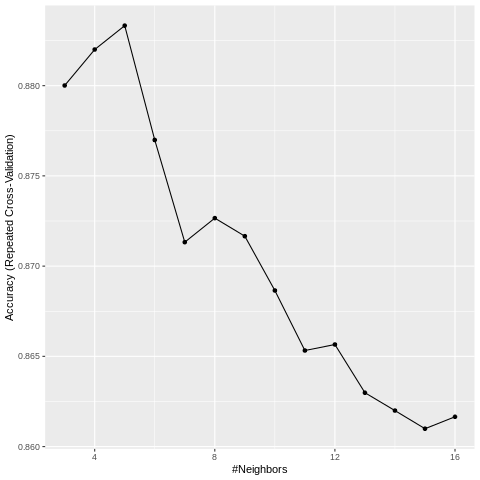

In [47]:
%%R

# ATENÇÃO ESSA EXECUÇÃO PODE LEVAR VÁRIOS MINUTOS
library(caret)

cv = trainControl(
  method = "repeatedcv", 
  number = 4
)

# Create a hyperparameter grid search
hyper_grid = expand.grid(k = seq(3, 16, 1))

# Execute grid search
knn_mnist = train(
  X,
  y,
  method = "knn",
  tuneGrid = hyper_grid,
  preProc = c("center", "scale"),
  trControl = cv
)

ggplot(knn_mnist)

In [49]:
%%R
knn_mnist$results

    k  Accuracy     Kappa  AccuracySD    KappaSD
1   3 0.8800090 0.8665516 0.012155701 0.01352233
2   4 0.8820019 0.8687568 0.007546485 0.00841415
3   5 0.8833259 0.8702298 0.017415232 0.01939585
4   6 0.8769894 0.8631837 0.023632305 0.02630900
5   7 0.8713272 0.8568823 0.017777306 0.01979806
6   8 0.8726596 0.8583624 0.026652467 0.02966632
7   9 0.8716583 0.8572433 0.024331492 0.02708264
8  10 0.8686499 0.8538938 0.021217263 0.02362354
9  11 0.8653236 0.8501848 0.023420037 0.02609657
10 12 0.8656565 0.8505563 0.024834410 0.02766599
11 13 0.8629841 0.8475670 0.025744730 0.02867230
12 14 0.8619938 0.8464629 0.024999967 0.02783868
13 15 0.8609916 0.8453521 0.023668004 0.02635094
14 16 0.8616525 0.8460660 0.024648333 0.02745997


A seleção dos hiperparâmetros no fornece um valor de k=5 com uma acuracidade de 0.883. Esse é um modelo de execução bastante demorada e que deve gerar uma série de alertas na execução. Acesse Bradley Boehmke & Brandon Greenwell (2020) se quiser saber mais sobre como aplicar esse procedimento e eliminar seus alertas. 

# Síntese

Nesta aula você aprendeu como **empregar o R** em tarefas de **Aprendizado de Máquina Supervisionado para Regressão e Classificação**. 

Você aprendeu como aplicar modelos de regressão linear múltipla, e  alguns dos principais modelos classificação como **Árvores de Decisão, Naive Bayes, Regressão Logística e K-Vizinhos mais Próximos**. Pode também aprender procedimentos em R para separação de conjuntos de treinamento e teste, criação da matriz de confusão, obtenção da acuracidade etc.

Empregou também o **pacote Caret**, um poderoso pacote R para o treinamento de múltiplos modelos de Aprendizado Supervisionado e, com ele, entendeu como aplicar os esquemas de **Cross Validation** e fazer a seleção de hiperparâmetros e mesmo de diferentes modelos (este último apenas deixamos indicação para você) e aplicamos todos esses procedimentos a conjuntos de dados reais. 

Por último, vale reforçar aqui que a **escolha por Python ou R deve ter por base seus propósitos, seu contexto e os dados do seu problema**, não havendo uma melhor linguagem *apriori* para quaisquer situações. 






 


# Para Saber Mais

* Acesse Bradley Boehmke & Brandon Greenwell , **Hands-On Machine Learning with R** (2020). Disponível em: https://bradleyboehmke.github.io/HOML/ para entender e aprender mais sobre modelos de Aprendizado de Máquina com R. 

* **Dificuldades com R?** Acesse esses Tutoriais bem rápidos que poderão ajudar você a recordar como empregar as principais funções do R:

> * **Quick-R by Datacamp** https://www.statmethods.net/

> * **R Tutorial. An R Introduction to Statistics** http://www.r-tutor.com/

* Acesse a documentação do pacote Caret **The caret Package** by Max Kuhn (2019). Disponível em: https://topepo.github.io/caret/index.html e ainda 
https://pycaret.org/ para saber mais sobre esse pacote incrível para lidar com dados e modelos. 








# Referências

* Bradley Boehmke & Brandon Greenwell , **Hands-On Machine Learning with R** (2020). Disponível em: https://bradleyboehmke.github.io/HOML/. Acesso: 15 de Maio de 2022.

* Oliveira, Rogério de. **Ciência de Dados com R** (2020) Disponível em: http://meusite.mackenzie.br/rogerio/CDABook/_book/. Acesso: 15 de Maio de 2022.

* Kuhn, Max. **The caret Package** (2019). Disponível em: https://topepo.github.io/caret/index.html. Acesso: 15 de Maio de 2022.
